# Aula_150324_Titanic_RF

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sns.__version__)

0.13.2


<Axes: >

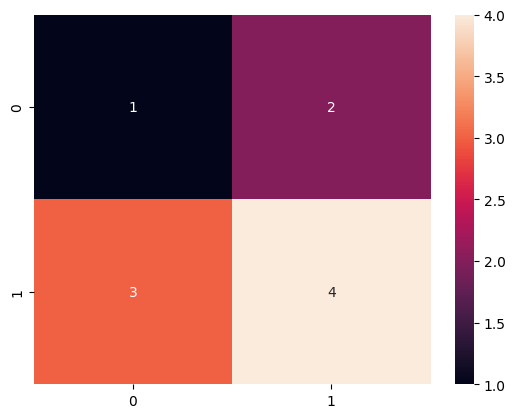

In [3]:
teste =[[1,2],[3,4]]
sns.heatmap(teste,annot=True)

In [4]:
d_train=pd.read_csv("../datasets/titanic_train.csv")
d_test =pd.read_csv("../datasets/titanic_test.csv")
d_pred =pd.read_csv("../datasets/titanic_test_results.csv")

### Features & Label

- Survived: Wheather the person Survived or not. - Only in the Train dataset :-)

- Pclass: The class of the ticket the passenger purchased.

- SibSp: Shows the number of Sibling/Spouces the passenger had aboard the Titanic.

- Parch: Indicates the number of parents or children the passenger had aboard.

- TIcket: Ticket name/Number.

- Fare: How much the Passenger paid.

- Cabin: Cabin name of that Passenger.

- Embarked: Point of Embarkation where C means Cherbourg, Q means Queenstown, S means Southampton.

Notes:

pclass: 1=1st, 2=2nd, 3=3rd

Sibsp: The dataset defines family relations in this way…
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: The dataset defines family relations in this way…
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
d_train.columns,d_test.columns,d_pred.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Survived'], dtype='object'))

In [6]:
d_train.shape,d_test.shape,d_pred.shape

((891, 12), (418, 11), (418, 2))

In [7]:
d_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
d_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
nulls=pd.DataFrame(d_train.isnull().sum(), columns=['Train'])
nulls['Teste'] = d_test.isnull().sum()
nulls

,Train,Teste
PassengerId,0,0.0
Survived,0,NaN
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,86.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,1.0


In [10]:
d_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
d_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Histograma das idades

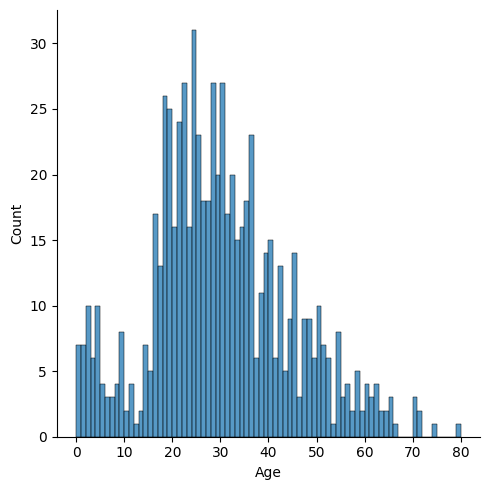

In [12]:
sns.displot(d_train['Age'].dropna(),bins=range(0,81,1))

# Histograma dos preços

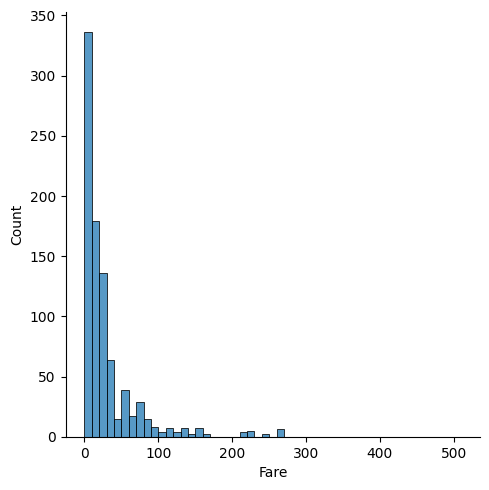

In [13]:
sns.displot(d_train['Fare'].dropna(),bins=range(0,520,10))

### Há bilhetes acima de 500
### Vamos lista-los

In [14]:
d_train[d_train['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [15]:
d_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Como estão todos no mesmo nº de bilhete, vamos procurar por situações semelhantes

In [16]:
d_train[d_train['Ticket']=='PC 17755']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [17]:
d_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
d_train.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [19]:
d_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
d_train[d_train['Ticket']=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [21]:
d_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Contagem de valores únicos por feature

In [22]:
d_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [23]:
d_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Name tem 891 valores distintos, ou seja, não adiciona valor para à informação. Pode ser eliminado
### Existem 3 possíveis valores para Embaked

In [24]:
d_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Quantos passageiros embarcaram em cada porto?

In [25]:
d_train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### Vamos ver a taxa de sobrevivência por porto de embarque

In [26]:
print(d_train[d_train.Survived==0].groupby('Embarked').count().Survived)
print(d_train[d_train.Survived==1].groupby('Embarked').count().Survived)

Embarked
C     75
Q     47
S    427
Name: Survived, dtype: int64
Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64


In [27]:
d_train[d_train.Survived==1].groupby('Embarked').count().Survived/d_train.Embarked.value_counts()*100

Embarked
C    55.357143
Q    38.961039
S    33.695652
dtype: float64

### Taxa de sobrevivência global

In [28]:
d_train[d_train.Survived==1].count().PassengerId/len(d_train)*100

38.38383838383838

# Ou posso calcular de outra forma

In [29]:
pd.pivot_table(d_train, index='Embarked',values='Survived')

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [30]:
pd.pivot_table(d_train, index='Sex',values='Survived')

,Survived
Sex,
female,0.742038
male,0.188908


In [31]:
pd.pivot_table(d_train, index='Pclass',values='Survived')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Vamos analisar a idade

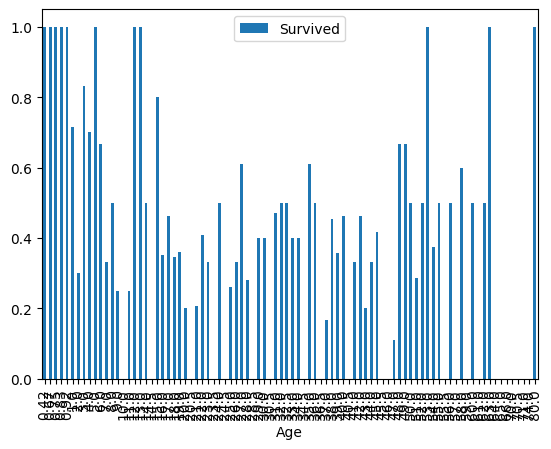

In [32]:
pclass_pivot=pd.pivot_table(d_train,index='Age',values='Survived')
pclass_pivot.plot.bar()
plt.show()

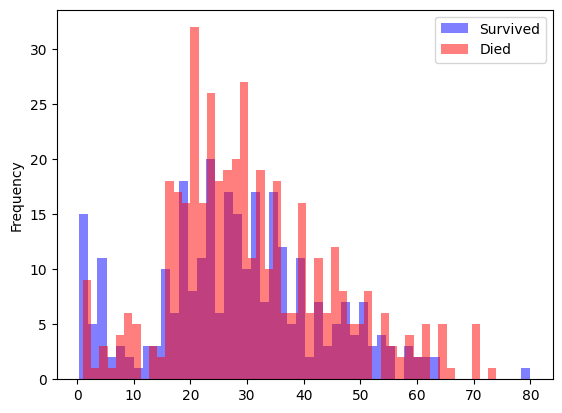

In [33]:
survived=d_train[d_train['Survived']==1]
died    =d_train[d_train['Survived']==0]

survived['Age'].plot.hist(alpha=0.5,color='blue',bins=50)
died    ['Age'].plot.hist(alpha=0.5,color='red',bins=50)

plt.legend(['Survived','Died'])
plt.show()

In [34]:
d_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [35]:
def process_age(df, cut_points, label_name):
    df['Age']=df['Age'].fillna(-0.5)
    df['Age_categories']=pd.cut(df['Age'],cut_points,labels=label_names)
    return df

In [36]:
cut_points=[-1,0,18,100]
label_names=['Idade desconhecida','Menor','Adulto']

train=process_age(d_train,cut_points,label_names)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adulto
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adulto
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,W./C. 6607,23.4500,NaN,S,Idade desconhecida
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adulto


In [37]:
cut_points=[-1,0,5,12,18,35,60,100]
label_names=['Idade desconhecida','Bebé','Criança','Adolescente','Jovem','Adulto','Senior']

d_train=process_age(d_train,cut_points,label_names)
d_test=process_age(d_test,cut_points,label_names)

In [38]:
d_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Jovem
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adulto
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Jovem
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Jovem
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,A.5. 3236,8.0500,NaN,S,Idade desconhecida
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Adulto
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Adulto
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,359309,8.0500,NaN,S,Idade desconhecida


C:\Users\benso\AppData\Local\Temp\ipykernel_19596\3092175059.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_cat_pivot=pd.pivot_table(d_train,index='Age_categories',values='Survived')


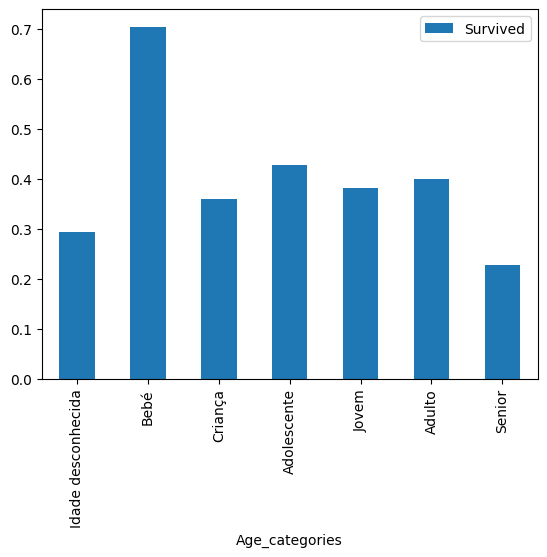

In [39]:
age_cat_pivot=pd.pivot_table(d_train,index='Age_categories',values='Survived')
age_cat_pivot.plot.bar()
plt.show()

## Continuação 19/03/24

In [40]:
def create_dummies(df, coluna):
    dummies = pd.get_dummies(df[coluna],prefix=coluna,dtype=int)
    df=pd.concat([df,dummies],axis=1)
    return df

In [41]:
d_train=create_dummies(d_train,'Pclass')
d_test=create_dummies(d_test,'Pclass')


d_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Jovem,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adulto,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Jovem,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Jovem,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,A.5. 3236,8.0500,NaN,S,Idade desconhecida,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Adulto,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Adulto,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,359309,8.0500,NaN,S,Idade desconhecida,0,0,1


In [42]:
d_train=create_dummies(d_train,'Sex')
d_test=create_dummies(d_test,'Sex')

d_train=create_dummies(d_train,'Age_categories')
d_test=create_dummies(d_test,'Age_categories')

d_train=create_dummies(d_train,'Embarked')
d_test=create_dummies(d_test,'Embarked')

d_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_categories_Idade desconhecida,Age_categories_Bebé,Age_categories_Criança,Age_categories_Adolescente,Age_categories_Jovem,Age_categories_Adulto,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,0,0,0,1


In [43]:
pd.set_option('display.max_columns',None)

In [44]:
d_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Idade desconhecida,Age_categories_Bebé,Age_categories_Criança,Age_categories_Adolescente,Age_categories_Jovem,Age_categories_Adulto,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Jovem,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adulto,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Jovem,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Jovem,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Jovem,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1


 - name não tem informação util --> pode ser apagado
 - juntar train e teste para fazer pre-processamento

In [45]:
df=pd.concat([d_train,d_test])

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Idade desconhecida,Age_categories_Bebé,Age_categories_Criança,Age_categories_Adolescente,Age_categories_Jovem,Age_categories_Adulto,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Jovem,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adulto,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Jovem,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Jovem,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Jovem,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,-0.5,0,0,A.5. 3236,8.0500,NaN,S,Idade desconhecida,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Adulto,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Adulto,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,-0.5,0,0,359309,8.0500,NaN,S,Idade desconhecida,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1


In [47]:
df.nunique()

PassengerId                          1309
Survived                                2
Pclass                                  3
Name                                 1307
Sex                                     2
Age                                    99
SibSp                                   7
Parch                                   8
Ticket                                929
Fare                                  281
Cabin                                 186
Embarked                                3
Age_categories                          7
Pclass_1                                2
Pclass_2                                2
Pclass_3                                2
Sex_female                              2
Sex_male                                2
Age_categories_Idade desconhecida       2
Age_categories_Bebé                     2
Age_categories_Criança                  2
Age_categories_Adolescente              2
Age_categories_Jovem                    2
Age_categories_Adulto             

In [48]:
df.isnull().sum()

PassengerId                             0
Survived                              418
Pclass                                  0
Name                                    0
Sex                                     0
Age                                     0
SibSp                                   0
Parch                                   0
Ticket                                  0
Fare                                    1
Cabin                                1014
Embarked                                2
Age_categories                          0
Pclass_1                                0
Pclass_2                                0
Pclass_3                                0
Sex_female                              0
Sex_male                                0
Age_categories_Idade desconhecida       0
Age_categories_Bebé                     0
Age_categories_Criança                  0
Age_categories_Adolescente              0
Age_categories_Jovem                    0
Age_categories_Adulto             

#notas

In [49]:
df=df.drop(['Name','Cabin'],axis=1)

In [50]:
df=df.dropna(subset=['Embarked'])
len(df)

1307

### nota

In [51]:
df[df.Pclass_1==1].Fare.mean(),df[df.Pclass_2==1].Fare.mean(),df[df.Pclass_3==1].Fare.mean()

(87.55577663551402, 21.1791963898917, 13.302888700564973)

In [52]:
pd.pivot_table(df,index='Pclass',values='Fare')

,Fare
Pclass,
1,87.555777
2,21.179196
3,13.302889


In [53]:
# Vamos ver qual classe em que viajava o passageiro com null no Fare
df[df.Fare.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Idade desconhecida,Age_categories_Bebé,Age_categories_Criança,Age_categories_Adolescente,Age_categories_Jovem,Age_categories_Adulto,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
152,1044,NaN,3,male,60.5,0,0,3701,NaN,S,Senior,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1


In [54]:
df.loc[152]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Idade desconhecida,Age_categories_Bebé,Age_categories_Criança,Age_categories_Adolescente,Age_categories_Jovem,Age_categories_Adulto,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
152,153,0.0,3,male,55.5,0,0,A.5. 11206,8.05,S,Adulto,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
152,1044,NaN,3,male,60.5,0,0,3701,NaN,S,Senior,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1


In [55]:
# Vamos atribiur o PassengerId como Index
df=df.set_index('PassengerId')

In [56]:
df.loc[1044]

Survived                                NaN
Pclass                                    3
Sex                                    male
Age                                    60.5
SibSp                                     0
Parch                                     0
Ticket                                 3701
Fare                                    NaN
Embarked                                  S
Age_categories                       Senior
Pclass_1                                  0
Pclass_2                                  0
Pclass_3                                  1
Sex_female                                0
Sex_male                                  1
Age_categories_Idade desconhecida         0
Age_categories_Bebé                       0
Age_categories_Criança                    0
Age_categories_Adolescente                0
Age_categories_Jovem                      0
Age_categories_Adulto                     0
Age_categories_Senior                     1
Embarked_C                      

In [57]:
df.loc[1044,'Fare']=13.302889

In [58]:
df[df.Fare.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Idade desconhecida,Age_categories_Bebé,Age_categories_Criança,Age_categories_Adolescente,Age_categories_Jovem,Age_categories_Adulto,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,


In [59]:
df.isnull().sum()

Survived                             418
Pclass                                 0
Sex                                    0
Age                                    0
SibSp                                  0
Parch                                  0
Ticket                                 0
Fare                                   0
Embarked                               0
Age_categories                         0
Pclass_1                               0
Pclass_2                               0
Pclass_3                               0
Sex_female                             0
Sex_male                               0
Age_categories_Idade desconhecida      0
Age_categories_Bebé                    0
Age_categories_Criança                 0
Age_categories_Adolescente             0
Age_categories_Jovem                   0
Age_categories_Adulto                  0
Age_categories_Senior                  0
Embarked_C                             0
Embarked_Q                             0
Embarked_S      

In [60]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Idade desconhecida,Age_categories_Bebé,Age_categories_Criança,Age_categories_Adolescente,Age_categories_Jovem,Age_categories_Adulto,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
count,889.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,0.382452,2.296863,23.736932,0.499617,0.385616,33.208714,0.245601,0.211936,0.542464,0.355011,0.644989,0.201224,0.042846,0.029074,0.075746,0.406274,0.220352,0.024484,0.206580,0.094109,0.699311
std,0.486260,0.836942,17.705512,1.042273,0.866092,51.749097,0.430608,0.408836,0.498384,0.478700,0.478700,0.401069,0.202588,0.168079,0.264693,0.491325,0.414643,0.154604,0.405006,0.292092,0.458733
min,0.000000,1.000000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,7.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
df.dtypes

Survived                              float64
Pclass                                  int64
Sex                                    object
Age                                   float64
SibSp                                   int64
Parch                                   int64
Ticket                                 object
Fare                                  float64
Embarked                               object
Age_categories                       category
Pclass_1                                int32
Pclass_2                                int32
Pclass_3                                int32
Sex_female                              int32
Sex_male                                int32
Age_categories_Idade desconhecida       int32
Age_categories_Bebé                     int32
Age_categories_Criança                  int32
Age_categories_Adolescente              int32
Age_categories_Jovem                    int32
Age_categories_Adulto                   int32
Age_categories_Senior             

In [62]:
df=df.drop(['Pclass','Sex','Age_categories','Embarked','Ticket'],axis=1)
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Idade desconhecida,Age_categories_Bebé,Age_categories_Criança,Age_categories_Adolescente,Age_categories_Jovem,Age_categories_Adulto,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,22.0,1,0,7.2500,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,1.0,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,1.0,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
4,1.0,35.0,1,0,53.1000,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
5,0.0,35.0,0,0,8.0500,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1


In [63]:
df_test=df[df.Survived.isnull()]
df_train=df.drop(df_test.reset_index().PassengerId,axis=0)

In [64]:
df_train

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Idade desconhecida,Age_categories_Bebé,Age_categories_Criança,Age_categories_Adolescente,Age_categories_Jovem,Age_categories_Adulto,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,22.0,1,0,7.2500,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,1.0,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,1.0,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
4,1.0,35.0,1,0,53.1000,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
5,0.0,35.0,0,0,8.0500,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0.0,27.0,0,0,13.0000,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
888,1.0,19.0,0,0,30.0000,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
889,0.0,-0.5,1,2,23.4500,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1


In [65]:
d_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Idade desconhecida,Age_categories_Bebé,Age_categories_Criança,Age_categories_Adolescente,Age_categories_Jovem,Age_categories_Adulto,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Jovem,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adulto,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Jovem,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Jovem,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,A.5. 3236,8.0500,NaN,S,Idade desconhecida,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Adulto,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Adulto,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,359309,8.0500,NaN,S,Idade desconhecida,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1


# Treino

## Random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score

In [67]:
X_train=df_train.drop(['Survived'],axis=1)
y_train=df_train['Survived']

X_test=df_test.drop(['Survived'],axis=1)
y_test=d_pred.Survived

In [68]:
rf=RandomForestClassifier(random_state=24)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=24)

In [69]:
rf_pred=rf.predict(X_test)

print("Random Forest Accuracy: {}".format(accuracy_score(y_test,rf_pred)*100))

Random Forest Accuracy: 83.01435406698565


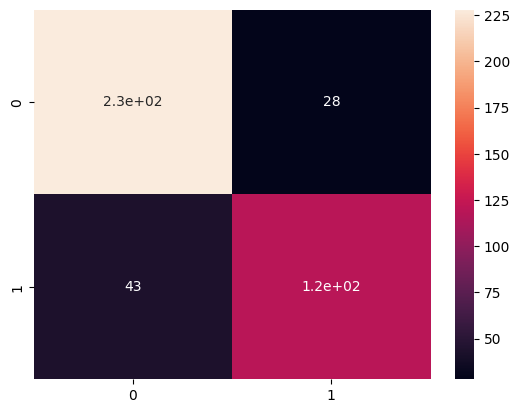

In [70]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True)
plt.show()

# Otimizar

In [71]:
%%time
rf_params={
    'max_depth':[None,3,5,8,10],
    'max_features':['sqrt','log2',None,3,5,10],
    'n_estimators':[2,5,10,50,100,200],
    'min_samples_split':[2,5,10]
}
rf_cv_model= GridSearchCV(RandomForestClassifier(random_state=24),rf_params,cv=10,n_jobs=-1,verbose=1)
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 540 candidates, totalling 5400 fits


In [ ]:
rf_cv_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_split': 5,
 'n_estimators': 10}

In [ ]:
rf2=RandomForestClassifier(
    max_depth=rf_cv_model.best_params_['max_depth'],
    max_features=rf_cv_model.best_params_['max_features'],
    n_estimators=rf_cv_model.best_params_['n_estimators'],
    min_samples_split=rf_cv_model.best_params_['min_samples_split'],
    random_state=24
)
rf2.fit(X_train,y_train)

RandomForestClassifier(max_features=None, min_samples_split=5, n_estimators=10,
                       random_state=24)

In [ ]:
rf2_pred=rf2.predict(X_test)
accuracy_score(y_test,rf2_pred)*100

85.64593301435407

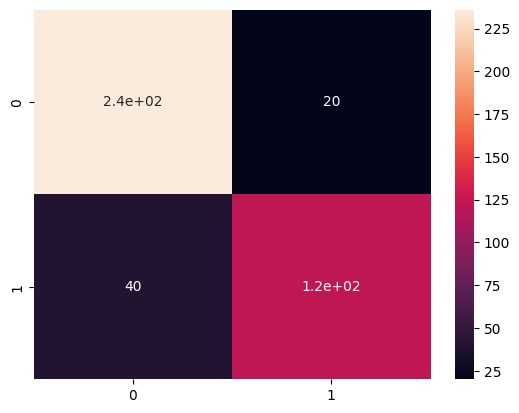

In [ ]:
sns.heatmap(confusion_matrix(y_test,rf2_pred),annot=True)
plt.show()